# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
- The dataset consists of 3,798 observations and 63 variables.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
- Public institutions have a larger proportion of 2-year colleges (926) compared to 4-year colleges (632).
- Private not-for-profit institutions overwhelmingly focus on 4-year programs (1180) with only a small number of 2-year programs (68).
-   Private for-profit institutions are almost equally distributed between 2-year (465) and 4-year (527) programs.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
- Private not-for-profit institutions tend to have the highest graduation rates.
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
- 4-year, Private not-for-profit institutions, with a median graduation rate of 41%, significantly higher than Private for-profit (12.5%) and Public 4-year (around 22%).
2-year institutions, regardless of control type, have much lower graduation rates overall.
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
- **Observations from Kernel Density Plots:**
    
    - **Private not-for-profit institutions** have significantly higher aid values, often above **$10,000**.
    - **Public institutions** have much lower aid distributions, typically below **$5,000**.
    - **Private for-profit institutions** fall somewhere in between.
- **Summary Statistics by `control` and `level`:**
    
    - **Private not-for-profit 4-year institutions** receive the most aid (**median = $13,774**).
    - **Public 2-year institutions** receive the least aid (**median = $3,943**).
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?
- **Overall trend:** A slight positive correlation between **higher aid and higher graduation rates**.
- **By Level:**
    - **4-year institutions** tend to show a clearer **positive correlation** than 2-year institutions.
- **By Control:**
    - **Private not-for-profit institutions** exhibit a **stronger positive relationship**, suggesting that institutions providing more aid tend to have **higher graduation rates**.
    - **Public institutions** and **for-profit institutions** show **weaker correlations**, indicating other factors may be influencing graduation rates.

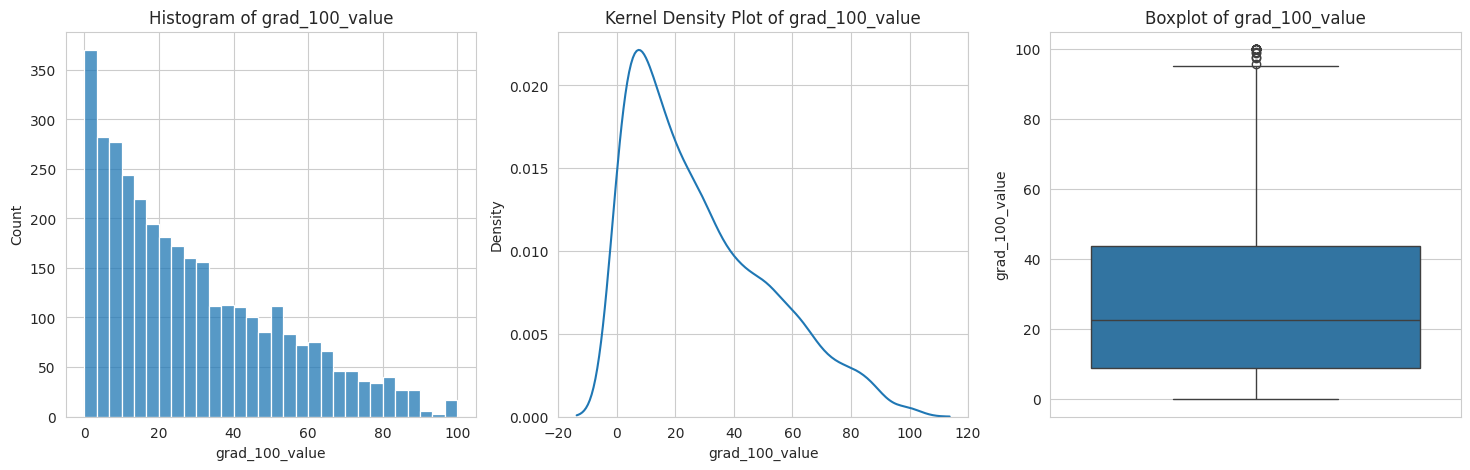

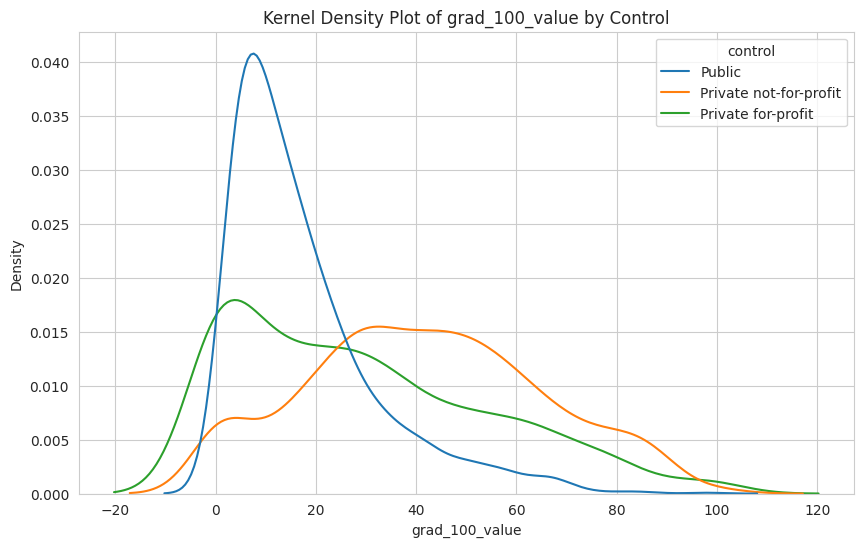

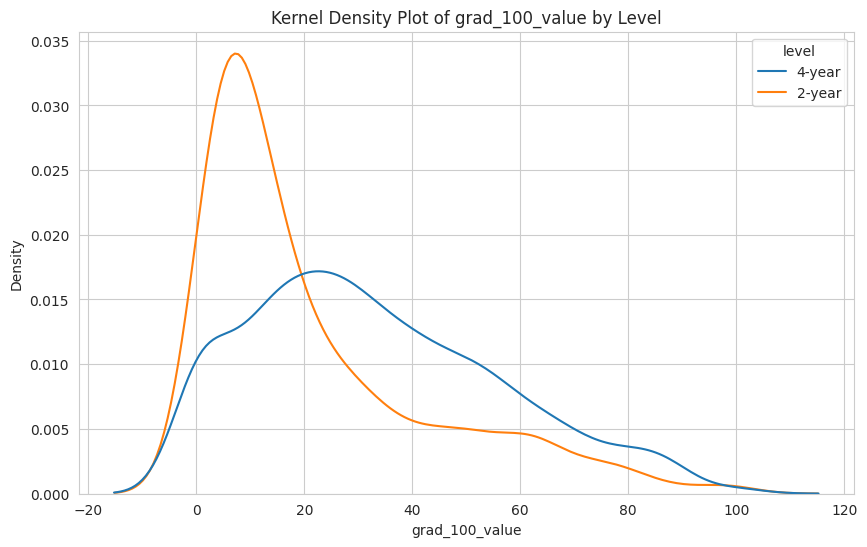

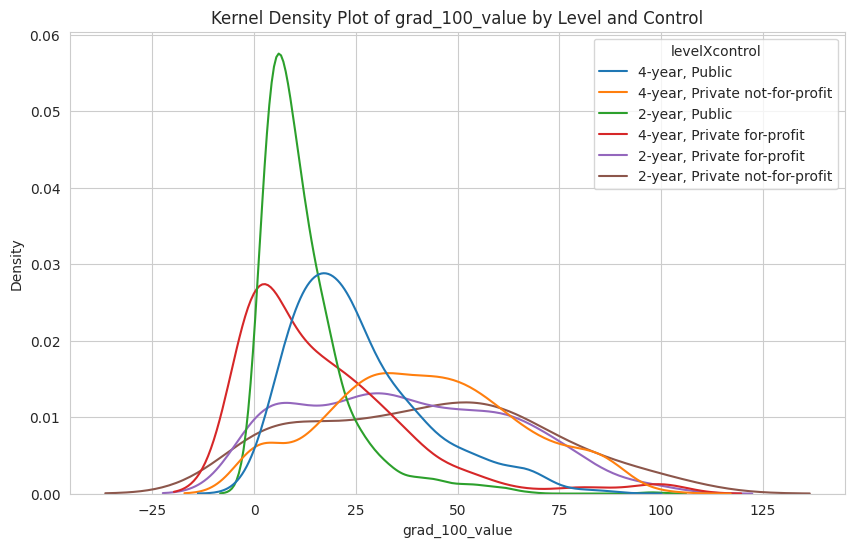

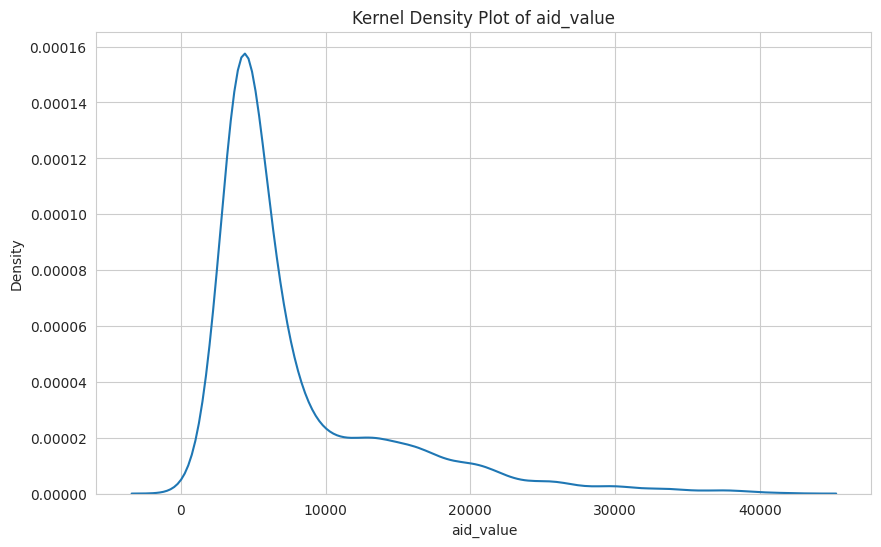

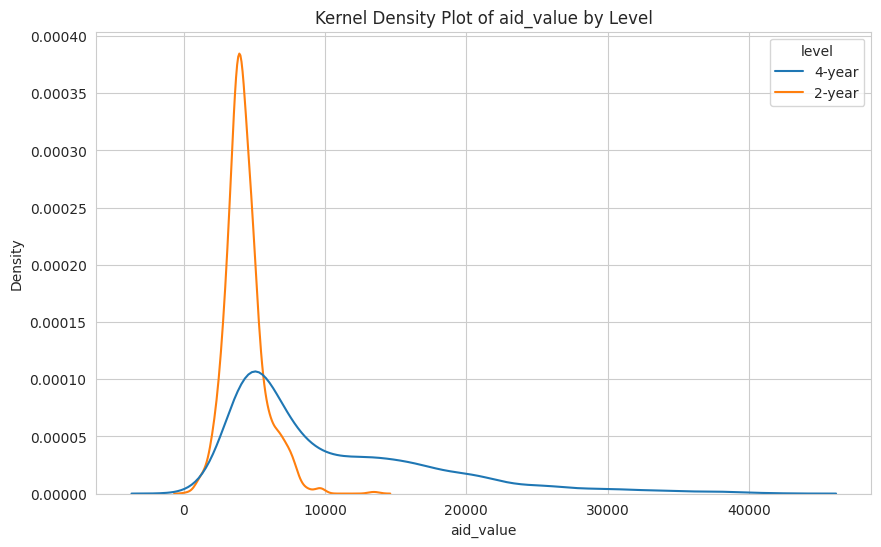

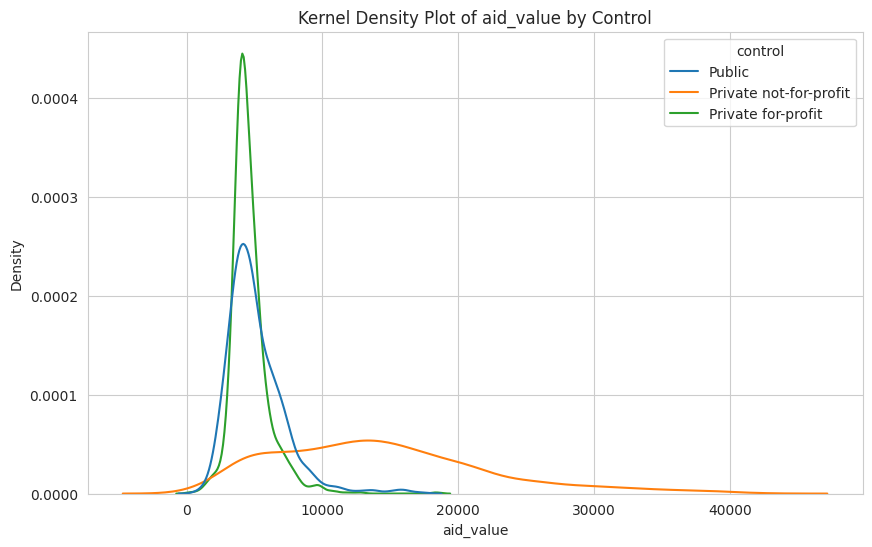

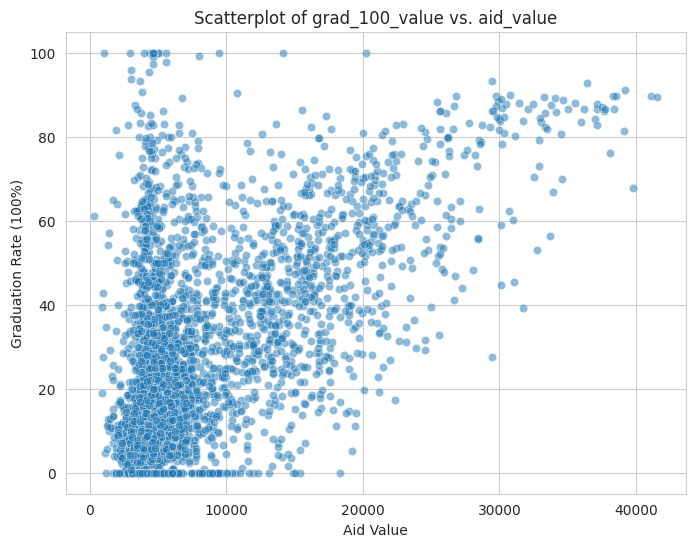

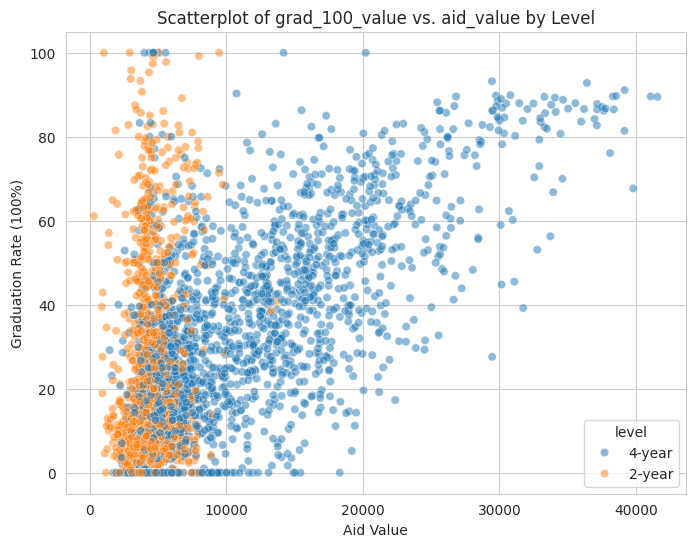

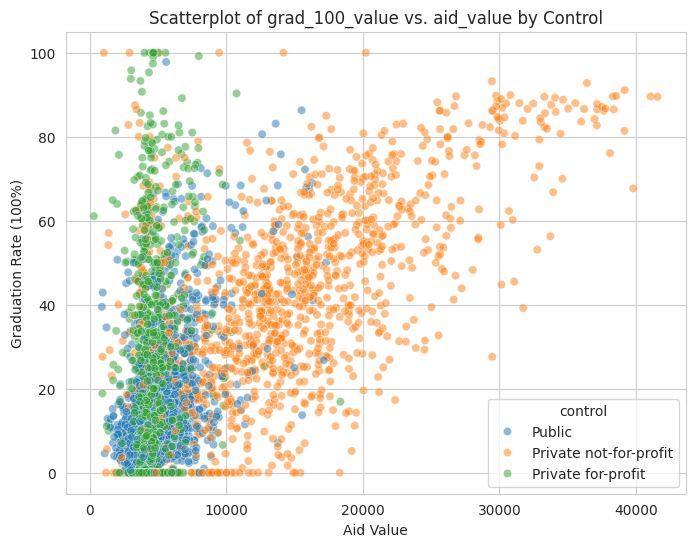

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/home/hanyan/dev/visualization/assignment/data/college_completion.csv"
df = pd.read_csv(file_path)

# Display the dimensions of the dataset
dimensions = df.shape

# Display the first few rows of the dataset
head_data = df.head()

# Display column names
columns = df.columns

dimensions, columns, head_data


# Cross-tabulation of `control` and `level`
cross_tab = pd.crosstab(df['control'], df['level'])

# Display cross-tabulation
cross_tab


# Set plot style
sns.set_style("whitegrid")

# Create subplots for different visualizations of `grad_100_value`
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
sns.histplot(df['grad_100_value'].dropna(), bins=30, kde=False, ax=axes[0])
axes[0].set_title('Histogram of grad_100_value')

# Kernel Density Plot
sns.kdeplot(df['grad_100_value'].dropna(), ax=axes[1])
axes[1].set_title('Kernel Density Plot of grad_100_value')

# Boxplot
sns.boxplot(y=df['grad_100_value'], ax=axes[2])
axes[2].set_title('Boxplot of grad_100_value')

# Show plots
plt.show()

# Statistical description
grad_100_stats = df['grad_100_value'].describe()
grad_100_stats


# Grouped kernel density plot by `control` and `level` for `grad_100_value`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Control')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Level')
plt.show()

# Grouped statistical description of `grad_100_value` by `level` and `control`
grad_100_grouped_stats = df.groupby(['level', 'control'])['grad_100_value'].describe()
grad_100_grouped_stats


# Create a new variable `levelXcontrol` that interacts `level` and `control`
df['levelXcontrol'] = df['level'] + ', ' + df['control']

# Kernel density plot of `grad_100_value` grouped by `levelXcontrol`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', common_norm=False)
plt.title('Kernel Density Plot of grad_100_value by Level and Control')
plt.show()


# Kernel density plot of `aid_value`
plt.figure(figsize=(10, 6))
sns.kdeplot(df['aid_value'].dropna())
plt.title('Kernel Density Plot of aid_value')
plt.show()

# Grouped kernel density plot of `aid_value` by `level` and `control`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='level', common_norm=False)
plt.title('Kernel Density Plot of aid_value by Level')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='control', common_norm=False)
plt.title('Kernel Density Plot of aid_value by Control')
plt.show()

# Grouped statistical description of `aid_value` by `level` and `control`
aid_value_grouped_stats = df.groupby(['level', 'control'])['aid_value'].describe()
aid_value_grouped_stats


# Scatterplot of `grad_100_value` vs. `aid_value`
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['aid_value'], y=df['grad_100_value'], alpha=0.5)
plt.title('Scatterplot of grad_100_value vs. aid_value')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()

# Scatterplot grouped by `level`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='level', alpha=0.5)
plt.title('Scatterplot of grad_100_value vs. aid_value by Level')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()

# Scatterplot grouped by `control`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue='control', alpha=0.5)
plt.title('Scatterplot of grad_100_value vs. aid_value by Control')
plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (100%)')
plt.show()


**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.